Common supervised learning tasks are Regression(predicting values) and classification(predicting classes)

# MNIST

It is a dataset of 70,000 small iamges of digits handwritten by high school students and employees of the US Census Bureau. Each imagtei s labeled with the digit it represents. This has been the de-facto entry point for people starting with machine learning.


# Scikit-learn Datasets

Scikit-learn provides many helper functions to download popular datasets.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = False, parser = 'auto') #fetch_openml returns images as DataFrames and labels as Pandas series
#But dataframes are not ideal for that, so it is preferable to set as_frame = False to get the data as NumPy arrays.

The sklearn.datasets package contains mostly three types of functions:- 
1) fetch_* (download real life datasets)
2) load_* ( download small toy datasets bundled with Scikit-Learn that need not be downloaded from the internet)
3) make_* ( generates fake datasets that are returned as (X,y) typles containing the input data and targets as numpy arrays)

non-fake datasets are returned as sklearn.utils.Bunch objects, which are dictionares whose entries can also be accessed as attributes. They contain the following entries:-

1) DESCR - a description of the dataset
2) data - The input data, usually as a 2D NumPy array
3) target - the labels, usually a 1d NumPy array

In [2]:
x,y = mnist.data, mnist.target

In [3]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

There are 70,000 images each with 784 features. (28 x 28). 
each feature represents on pixel's intensity from 0(white) to 255(black).


In [7]:
import matplotlib.pyplot as plt
import random 
import numpy as np

In [8]:
def fetch_digit1D():
    index = random.randint(0,69999)
    test_digit = x[index]
    return (test_digit, index)

In [9]:
def fetch_digit2D():
    index = random.randint(0,69999)
    test_digit = x[index]
    test_digit = test_digit.reshape(28,28)
    return (test_digit, index)

In [10]:
def plot_digit():
    test_digit,index = fetch_digit2D()
    print(index)
    plt.imshow(test_digit, cmap = 'binary')
    plt.axis('off')

13878


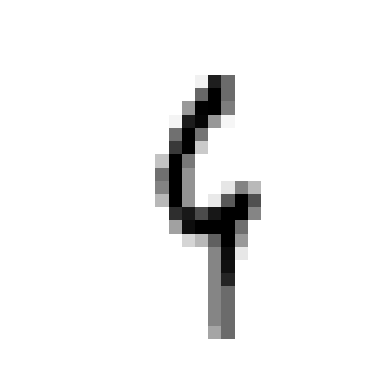

In [11]:
plot_digit()
plt.show()

# splitting data

The images are already shuffled, and ensures that all cross-validation folds will be similar. 
some algos are sensitive to the order of training instances, and they perform poorly if they get many similar instances in a row.
Shuffling maybe a bad idea in some contexts like time series data.
So, the datasets returned by fetch_openml are not always shuffled or split.

In [12]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

## identifying a single digit

In [13]:
from sklearn.linear_model import SGDClassifier


SGD stands for Stochastic Gradient Descent. It is capabale of handlign very large datasets efficiently, because it deals with training instances independantly, one at a time, making it suitable for online learning.

In [14]:
def single_digit_model(digit, x_train, y_train):
    y_train_5 = (y_train == '5')
    sgd_clf = SGDClassifier(random_state=42)
    sgd_clf.fit(x_train, y_train_5)
    return sgd_clf

In [15]:
digit = '5'

In [16]:
model = single_digit_model(digit, x_train, y_train)

In [17]:
y_train_digit = (y_train == digit)


In [18]:
np.unique(y_train_digit)

array([False,  True])

In [19]:
digit, index = fetch_digit1D()
model.predict([digit])

array([False])

## Performance Measures

### Cross-Validation

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,x_train, y_train_digit, cv = 3,scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

The perfromance measure is displaying good numbers, not because the model is good, but because the dataset is skewed, and the number of positive classes is too low. this makes the model right most of the time even if it outputs the wrong label for all the classes.
So, a better way to evaluate the classifier's performance is to use Confusion Matrix.

### Confusion matrices

Each row in a confusion matrix represents an acutal class, while each column represents a predicted lass. It counts the number of times instances of class A are classified as class B for all A/B pairs.

In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [22]:
y_train_pred  = cross_val_predict(model, x_train, y_train_digit, cv = 3)

In [23]:
cm = confusion_matrix(y_train_digit, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


53892 gives the true negatives, 687 gives the false positives(type 1 error). 1891 gives false negatives(type 2 error) and 3530 gives true positives.

A perfect Classifier would have only TP and TN. Only its main diagonal would contain non-zero values.

#### information from confusion matrix

##### Precision

it is the accuracy of positive predictions. Out of all the positive predictions, it gives the fraction of correct positive predictions

$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

##### Recall/sensitivity/True Positive Rate(TPR)

It is the ratio of positive instances that are correctly detected by the classifier.

$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

Increasing precision reduces recall, and increasing recall reduces precision. This is called precision/recall trade-off 

In [24]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_train_digit,y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_digit, y_train_pred)

0.6511713705958311

As seen here, the mode is detecting only about 65% of the 5s correctly, and whenever it says detects a 5 correctly only 83.7% of the time

##### F1 score

F1 score is a combined metrics of recall and precision to compare two classifiers.

It is the Harmonic mean of precision and recall. It gives more weight to lower values.(low means in reciprocal it prefers high precision and recalls)

A classifier will get a high F1 score only if both recall and precision and high

$$\text{F1} = \frac{\text{2}}{\frac{\text{1}}{\text{Precision}} + \frac{\text{1}}{\text{Recall}}}$$

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_digit, y_train_pred)

0.7325171197343846

##### which measure to use?

Depends on context. in some cases precision is highly important. ex:- filtering NSFW content. Losing some recall wont bother much. In some cases, such as criminal detection High recall is important. 


##### Precision/Recall Trade Off

Increasing precision reduces recall and vice versa.
This is called the precision/recall trade-off. This is because increasing the precision is associated with increasing the threshold. In that process, some positives may also be eliminated because of the high threshold point, resulting in lower recall.
Increasing recall is associated with decreasing the threshold to detect more positives. But in the process, some negatives are falsely labelled positive, resulting in lower precision.

In [29]:
from sklearn.metrics import precision_recall_curve


In [30]:
y_scores = cross_val_predict(model, x_train, y_train_digit, cv = 3, method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_digit, y_scores)

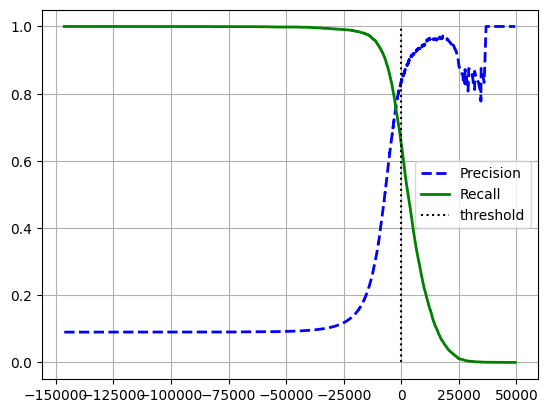

In [31]:
threshold = 0
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth=2)
plt.grid(True)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()

Precision curve is going to be bumpy, because some positives maybe lost on increasing the threshold, while retaining the negatives. But, recall always decreases, as some positives are lost.

Text(0, 0.5, 'Precision')

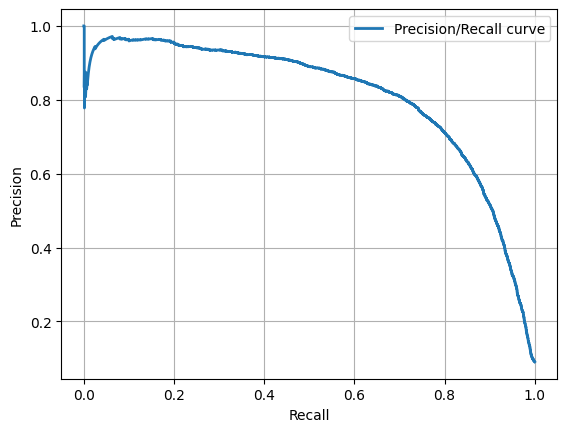

In [32]:
plt.plot(recalls, precisions, linewidth = 2, label = "Precision/Recall curve")
plt.grid(True)
plt.legend()
plt.xlabel('Recall')
plt.ylabel("Precision")

##### ROC Curve

Receriver operating characteristic (ROC) curve is a common tool used with binary classifiers. 

It plots TPR(recall) against FPR(fall-out). 

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_digit, y_scores)

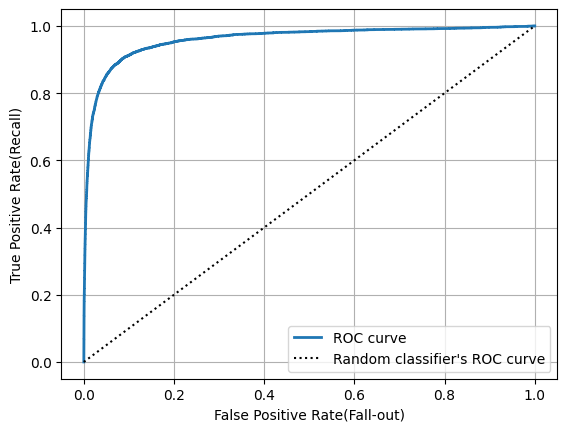

In [35]:
plt.plot(fpr, tpr, linewidth = 2, label = "ROC curve")
plt.plot([0,1],[0,1], 'k:', label = "Random classifier's ROC curve")
plt.xlabel('False Positive Rate(Fall-out)')
plt.ylabel("True Positive Rate(Recall)")
plt.legend()
plt.grid(True)

Two models can be compared using their 'auc (area under curve)' values. 

A perfect classifier will have aoc close to 1.

A purely random classifier will have aoc close to 0.5

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_digit, y_scores)

0.9604938554008616